In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sqlalchemy import create_engine

# Create a connection to the database we created offline
connection_string = "postgres:1234@localhost:5432/sql_challenge"
engine = create_engine(f'postgresql://{connection_string}')

In [16]:
# Confirm tables
engine.table_names()

['employees', 'departments', 'dept_manager', 'dept_emp', 'titles', 'salaries']

In [17]:
# Query All Records in the the Database
employees_data = pd.read_sql("SELECT * FROM employees", engine)
salaries_data = pd.read_sql("SELECT * FROM salaries", engine)
title_data = pd.read_sql("SELECT * FROM titles", engine)

In [18]:
salaries = salaries_data['salary']
salaries_data

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
5,10006,40000,1990-08-05,1991-08-05
6,10007,56724,1989-02-10,1990-02-10
7,10008,46671,1998-03-11,1999-03-11
8,10009,60929,1985-02-18,1986-02-18
9,10010,72488,1996-11-24,1997-11-24


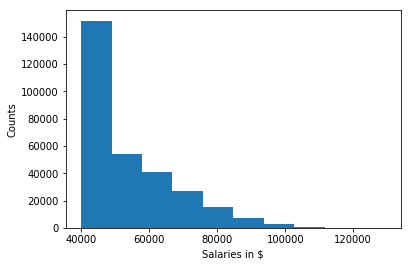

In [19]:
#Create a histogram to visualize the most common salary ranges for employees.
plt.hist(salaries)
plt.xlabel('Salaries in $')
plt.ylabel('Counts')
plt.show()

In [20]:
#Create a bar chart of average salary by title.
salary_title_data = pd.merge(salaries_data, title_data,  on="emp_no" )
salary_gp = salary_title_data.groupby('title')['salary'].mean()
salary_title_data

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01
5,10005,78228,1989-09-12,1990-09-12,Senior Staff,1996-09-12,9999-01-01
6,10005,78228,1989-09-12,1990-09-12,Staff,1989-09-12,1996-09-12
7,10006,40000,1990-08-05,1991-08-05,Senior Engineer,1990-08-05,9999-01-01
8,10007,56724,1989-02-10,1990-02-10,Senior Staff,1996-02-11,9999-01-01
9,10007,56724,1989-02-10,1990-02-10,Staff,1989-02-10,1996-02-11


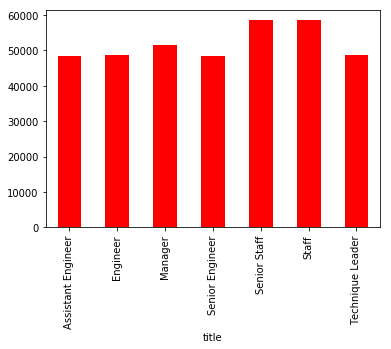

In [21]:
#plt.bar(salary_gp['title'], salary_gp.salary.mean(), color='r', alpha=0.5, align="center")
salary_gp.plot(kind="bar", facecolor="red")
plt.show()

In [22]:
my_data = salary_title_data[(salary_title_data['emp_no'] == 499942)]
my_data

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
443224,499942,40000,1998-03-28,1999-03-28,Technique Leader,1998-03-28,9999-01-01
